<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/RF_vs_XGBoost_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌲 Random Forest vs ⚡ XGBoost
Comparison on a synthetic noisy, nonlinear, imbalanced dataset

In [1]:
!pip install xgboost --quiet

In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Generate synthetic noisy imbalanced data
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=8, # real meaningful features.
                           n_redundant=2,   # real redundant features (with meaningful feature).
                           n_clusters_per_class=2, # cluster per class (each class has 2 clusters)
                           weights=[0.7, 0.3],
                           flip_y=0.1,           # Noise ratio
                           class_sep=0.8,        # Separation between clusters
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [19]:
# Train XGBoost (with small number of estimators for speed)
xgb = XGBClassifier(n_estimators=30, max_depth=6, learning_rate=0.1,
                    scale_pos_weight=0.7/0.3,
                    use_label_encoder=False,
                    eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:57:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Accuracy comparison
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Random Forest Accuracy:", acc_rf)
print("XGBoost Accuracy:", acc_xgb)

Random Forest Accuracy: 0.7833333333333333
XGBoost Accuracy: 0.7866666666666666


In [21]:
# Classification report F1 extraction
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
rf_f1 = [report_rf[str(i)]['f1-score'] for i in range(2)]
xgb_f1 = [report_xgb[str(i)]['f1-score'] for i in range(2)]

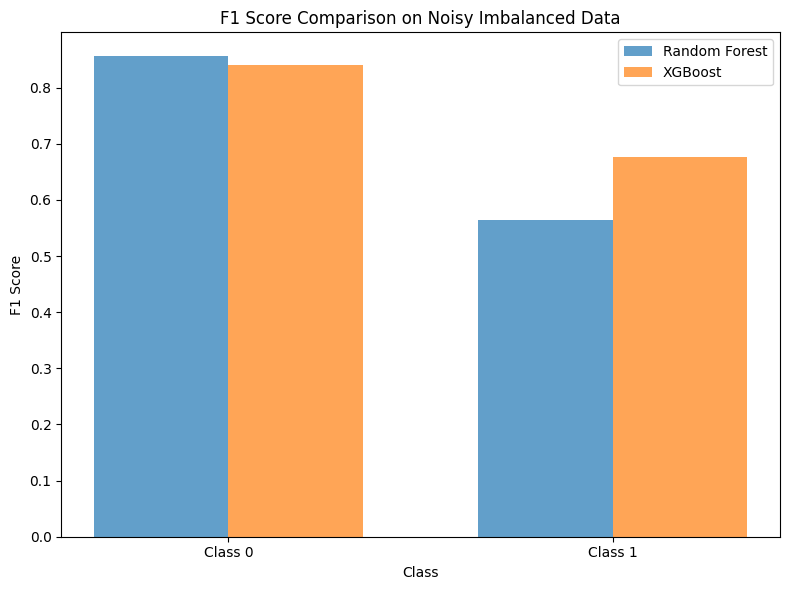

In [22]:
# Plot F1 score comparison
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, rf_f1, width=width, label='Random Forest', alpha=0.7)
plt.bar(x + width, xgb_f1, width=width, label='XGBoost', alpha=0.7)
plt.xticks(x + width / 2, labels)
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison on Noisy Imbalanced Data")
plt.legend()
plt.tight_layout()
plt.show()